# 3. Data Wrangling

<p style="text-align: justify;">Previamente se exploraron las columnas del DataFrame principal a profundidad con la finalidad de conocer el contenido del mismo, buscando tener un panorama más claro sobre la información que este puede brindar. A continuación, es necesario comenzar a trabajar en una limpieza profunda y un moldeado de las diversas columnas para posteriormente poder explorar los datos de mejor manera y obtener insights más relevantes. Cabe mencionar que a este proceso se le conoce como <b><i>Data Wrangling.</i></b></p>

Primero, se importan las librerías requeridas:

In [1]:
# Importación de datos y gestión de rutas
import sys
import os
sys.path.append('..') # Folder principal del projecto
from config import RAW_DATA_PATH

# Computación científica y manejo de datos
import pandas as pd
import numpy as np

# Filtrar warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Leer el archivo con la data cruda generada previamente y crear el DataFrame.
try:
    df = pd.read_csv(RAW_DATA_PATH, index_col = 17, low_memory=False)
except:
    raise FileNotFoundError('No se encontró el archivo, favor de ejecutar el Notebook "2_data_acquisition.ipynb"')

# Observar primeras filas del DataFrame
df.head(5)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?
complaint_id,,,,,,,,,,,,,,,,,
511074,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes
511080,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes
510473,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No
510326,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes
511067,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes


<p style="text-align: justify;">Se utilizan las funciones <b><i>describe</i></b> e <b><i>info</i></b> para obtener observar de manera detallada la estructura del DataFrame, analizando ya más a detalle el contenido en las filas del mismo. De esta manera, se pueden observar con facilidad diversas métricas de gran interés, como el total de registros, así como los valores únicos con los que cuenta cada columna y aquel valor con mayor frecuencia. Con esto, se puede conocer el dataset de mejor manera, y se pueden identificar algunos aspectos importantes a tomar en cuenta, como la variedad de productos financieros, el total de compañías y la cantidad de estados; además, podemos ver cuando se trata de variables categóricas. Dicho de manera más sencilla, se puede conocer de mejor manera la variabilidad de los diversos campos que componen el DataFrame. Además, se puede conocer el tipo de datos que almacenan cada una de las columnas, para que se modifiquen en caso de que sea necesario.</p>

In [3]:
# Observar estadistica descriptiva de las variables
df.describe(include= 'all')

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?
count,555957,555957,397635,555957,212622,66806,85124,555957,551070,551452,77959,123458,555957,555957,555957,555957,555957
unique,1608,11,46,95,68,65646,10,3605,62,27052,3,4,6,1557,8,2,2
top,08/27/2015,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Account status,This company continues to report on my credit ...,Company chooses not to provide a public response,Bank of America,CA,300XX,Older American,Consent provided,Web,11/13/2015,Closed with explanation,Yes,No
freq,963,186475,74319,97191,26798,37,52478,55998,81700,1205,45257,66807,361338,1108,404293,541909,443823


<p style="text-align: justify;">Se pueden observar ciertas variables como <b><i>product</i></b>, <b><i>issue</i></b>,<b><i>company_public_response</i></b>, entre otras; las cuales cuentan con valores únicos muy pequeños, por lo que podemos concluir que se trata de variables categóricas generalizadas con poca variabilidad.
Por otro lado, algunas variables como <b><i>zipcode</i></b> de igual manera son descriptivas y permiten categorizar las quejas. Sin embargo, la alta variabilidad en esta variable podría llegar a generar complicaciones al momento de generar el modelo, por lo que se podría optar por algún método de reducción de variabilidad para contener este factor.</p>

In [4]:
# Ejecutar nuevamente df.info() para analizar la estructura del DataFrame y generar modificaciones requeridas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555957 entries, 511074 to 984116
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

## 3.1 Tratamiento de Valores Nulos

<p style="text-align: justify;">Se procederá a iniciar con la limpieza del DataFrame, comenzando por uno de los puntos más importantes a tratar, el manejo de los valores nulos.</p>

In [5]:
# Explorar los valores nulos por columna.
df.isna().sum(axis = 0)

date_received                        0
product                              0
sub_product                     158322
issue                                0
sub_issue                       343335
consumer_complaint_narrative    489151
company_public_response         470833
company                              0
state                             4887
zipcode                           4505
tags                            477998
consumer_consent_provided       432499
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
dtype: int64

In [6]:
# Media del total de valores nulos por cada registro.
int(np.round(df.isna().sum(axis = 1).mean()))

4

<p style="text-align: justify;">Se cuenta con una media de cuatro valores nulos por registro, por lo que se puede prescindir de algunas columnas que podrían no ser relevantes para la creación del modelo, siendo estas las columnas con una cantidad significativa de valores nulos:</p>


- <p style="text-align: justify;"><i><b>sub_product</b></i>: Muestra una descripción más detallada del producto. Sin embargo, cuenta con una gran cantidad de datos faltantes, y dada esta problemática el modelo de clasificación podría utilizar el producto en general.</p>


- <p style="text-align: justify;"><i><b>subissue</b></i>: Sucede lo mismo que con producto y subproducto, ya que si bien muestra de manera más detallada el problema por el cual se presentó la queja, no hay manera de conocer aquellos valores nulos, los cuales son bastantes y por lo tanto sería incongruente agruparlos y categorizarlos con algún valor "otro", ya que habrían subissues con el mismo valor pero con diferente categoría en la columna *issue*.</p>


- <p style="text-align: justify;"><i><b>consumer_complaint_narrative</b></i>: Esto podría ser útil para un proyecto de text analytics, ya que presenta tal cual la descripción del cliente. Sin embargo, al ser valores únicos y contar con una gran cantidad de nulos, no servirá para el modelo de clasificación.</p>


- <p style="text-align: justify;"><i><b>company_public_response</b></i>: La respuesta pública de la compañía es opcional, y se cuenta con un altísimo número de valores nulos, por lo que no se podría obtener algún insight significativo.</p>


- <p style="text-align: justify;"><i><b>consumer_consent_provided</b></i>: Sucede algo similar al caso anterior, ya que el consentimiento público por parte del cliente no es publicado con frecuencia, por lo que se cuenta con una enorme cantidad de valores nulos, los cuales indican que no hubo consentimiento PÚBLICO, por lo que no enriquece al análisis.</p>


<p style="text-align: justify;">Ahora, se terminará de trabajar con la depuración de los valores nulos para las demás columnas.</p>

In [7]:
# Eliminar las columnas que se revisaron anteriormente, ya que no aportarían información al modelo.
df.drop(columns = ['sub_product','sub_issue',
                   'consumer_complaint_narrative', 'company_public_response',
                   'consumer_consent_provided'], inplace = True)
df.head()

,date_received,product,issue,company,state,zipcode,tags,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?
complaint_id,,,,,,,,,,,,
511074,08/30/2013,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,95993,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes
511080,08/30/2013,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,91104,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes
510473,08/30/2013,Credit reporting,Incorrect information on credit report,Wells Fargo & Company,NY,11764,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No
510326,08/30/2013,Student loan,Repaying your loan,"Navient Solutions, Inc.",MD,21402,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes
511067,08/30/2013,Debt collection,False statements or representation,Resurgent Capital Services L.P.,GA,30106,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes


In [8]:
# Explorar los valores nulos por columna luego de haber eliminado las anteriores
df.isna().sum(axis = 0)

date_received                        0
product                              0
issue                                0
company                              0
state                             4887
zipcode                           4505
tags                            477998
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
dtype: int64

<p style="text-align: justify;">Se puede observar que aún se cuenta con tres columnas con valores nulos, siendo la más preocupante la variable tags. Sin embargo, no se ha decidido descartarla hasta no validar su contenido, ya que los valores nulos en este caso podrían ser una categoría representativa. A continuación, se profundiza más a detalle en dichas variables, para determinar cómo será el tratamiento de los valores nulos.</p>

In [9]:
# Configurar para ver todos los valores en los value_counts().
pd.set_option('display.max_rows', None)

### 3.1.1 State

In [10]:
# Explorar valores en columa state.
df['state'].value_counts()

state
CA    81700
FL    53673
TX    41352
NY    38266
GA    24548
NJ    22408
PA    20015
IL    19624
VA    18150
MD    17703
OH    17380
NC    15501
MI    14486
AZ    12348
WA    11554
MA    11105
CO     9495
TN     8523
MO     7233
SC     7013
NV     6779
OR     6604
CT     6445
MN     6424
IN     6139
WI     6125
AL     5635
LA     5403
KY     3992
OK     3630
DC     3224
UT     2951
DE     2917
NH     2826
NM     2776
KS     2694
MS     2570
AR     2385
IA     2290
ME     1942
HI     1937
ID     1935
RI     1899
NE     1742
WV     1457
PR     1316
VT      943
MT      893
SD      757
AK      638
WY      551
ND      476
AE      219
AP      153
VI      144
GU       69
FM       32
MH       27
MP       19
AS       17
PW        9
AA        9
Name: count, dtype: int64

In [11]:
# Desplegar muestreo con registros con valor nulo dentro de la columna state.
df[df['state'].isna()].head(20)

,date_received,product,issue,company,state,zipcode,tags,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?
complaint_id,,,,,,,,,,,,
521653,09/10/2013,Money transfers,Money was not available when promised,TD Bank US Holding Company,NaN,NaN,NaN,Web,09/10/2013,Closed with explanation,Yes,Yes
522003,09/10/2013,Money transfers,Other transaction issues,HSBC North America Holdings Inc.,NaN,NaN,NaN,Web,09/11/2013,Closed with explanation,Yes,No
541527,09/25/2013,Bank account or service,Deposits and withdrawals,New York Community Bank,NaN,NaN,"Older American, Servicemember",Phone,09/25/2013,Closed with explanation,Yes,No
514861,09/02/2013,Mortgage,"Loan servicing, payments, escrow account",Ditech Financial LLC,NaN,NaN,NaN,Web,09/03/2013,Closed with explanation,Yes,No
513291,09/03/2013,Bank account or service,"Account opening, closing, or management",Citibank,NaN,NaN,NaN,Referral,09/06/2013,Closed with monetary relief,Yes,No
588372,11/06/2013,Bank account or service,Deposits and withdrawals,First Tennessee Bank,NaN,NaN,NaN,Referral,11/08/2013,Closed with explanation,Yes,No
558319,10/12/2013,Money transfers,Other transaction issues,PNC Bank N.A.,NaN,NaN,NaN,Web,10/15/2013,Closed with explanation,Yes,No
539304,09/23/2013,Mortgage,"Loan modification,collection,foreclosure",Bank of America,NaN,NaN,Servicemember,Web,09/24/2013,Closed with explanation,Yes,Yes
513416,09/03/2013,Credit reporting,Incorrect information on credit report,Equifax,NaN,NaN,Servicemember,Web,09/03/2013,Closed with non-monetary relief,Yes,Yes


<p style="text-align: justify;">Los valores nulos parecen tener los demás datos completos (a excepción del zipcode por obvias razones), sin embargo, al contar con una cantidad de registros bastante amplia, y debido a que todas las variables que se utilizarán son categóricas, se pueden eliminar estos registros y trabajar con los demás, ya que el removerlos NO afectaría de manera significativa al estudio de las variables</p>

In [12]:
# Eliminar los valores nulos de la columna state.
df = df.dropna(subset = ['state'])

# Validar que no existan valores nulos en la columna
print('Cantidad de registros: ', len(df), '\nNulos en "state: ', df['state'].isna().sum(), '\nValores distintos en "state": ', len(df['state'].value_counts()))

Cantidad de registros:  551070 
Nulos en "state:  0 
Valores distintos en "state":  62


<p style="text-align: justify;">Aquí se obtuvo otro insight bastante interesante...¿Por qué hay un total de 63 estados si Estados Unidos solo tiene 50? Luego de investigar a fondo dentro del sitio web de la CFPB, se pudo observar que se incluyen datos sobre todas las colonias americanas fuera del país, así como localidades militares.</p>

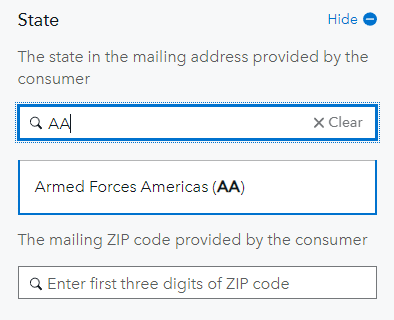

### 3.1.2 Zipcode

In [13]:
# Desplegar registros con valor nulo dentro de la columna zipcode.
df[df['zipcode'].isna()]

,date_received,product,issue,company,state,zipcode,tags,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?
complaint_id,,,,,,,,,,,,
698362,02/04/2014,Mortgage,"Loan modification,collection,foreclosure",Nationstar Mortgage,FL,NaN,NaN,Postal mail,02/10/2014,Closed with explanation,Yes,No
936980,07/15/2014,Bank account or service,"Account opening, closing, or management",HSBC North America Holdings Inc.,NY,NaN,NaN,Web,07/15/2014,Closed with explanation,Yes,No
1034776,09/18/2014,Debt collection,Improper contact or sharing of info,"Merchants Credit Adjusters, Inc.",NE,NaN,NaN,Web,09/18/2014,Closed with explanation,Yes,No
1603877,10/13/2015,Debt collection,Communication tactics,"Southwest Credit Systems, L.P.",WA,NaN,NaN,Web,10/26/2015,Closed,No,No
1606223,10/14/2015,Debt collection,Communication tactics,"Southwest Credit Systems, L.P.",NJ,NaN,NaN,Web,10/16/2015,Closed,Yes,No
1630486,10/29/2015,Mortgage,"Application, originator, mortgage broker",Education Management Corporation,KY,NaN,NaN,Web,10/30/2015,Closed with explanation,Yes,Yes
1643109,11/06/2015,Debt collection,Cont'd attempts collect debt not owed,"Eagle Recovery Associates, Inc.",IA,NaN,NaN,Web,11/06/2015,Untimely response,No,No
1164570,12/19/2014,Credit reporting,Incorrect information on credit report,Equifax,FL,NaN,NaN,Web,12/23/2014,Closed with non-monetary relief,Yes,No
1851096,03/26/2016,Debt collection,Cont'd attempts collect debt not owed,"Navient Solutions, Inc.",KS,NaN,NaN,Web,03/26/2016,Closed with explanation,Yes,Yes


In [14]:
# ¡Quedan solamente 10 registros nulos!
len(df[df['zipcode'].isna()])

10

In [15]:
# Agrupar los valores nulos restantes de la columna zipcode por estado.
df[df['zipcode'].isna()].groupby('state')['product'].count()

state
FL    2
IA    1
KS    1
KY    1
MI    1
NE    1
NJ    1
NY    1
WA    1
Name: product, dtype: int64

In [16]:
# Eliminar registros nulos en 'zipcode'
df = df.dropna(subset = ['zipcode'])

<p style="text-align: justify;">Son muy pocos los valores nulos que quedaron en la columna <i><b>zipcode</b></i> luego de haber eliminado los valores nulos de <i><b>state</b></i>, los cuales no tendrían ningún impacto, y en lugar de imputar aleatoriamente entre los códigos postales de cada estado, se cree que es más conveniente y sencillo eliminar estos registros.</p>

### 3.1.3 Tags

<p style="text-align: justify;">La columna <i><b>tags</b></i> es la última con valores nulos dentro del DataFrame principal, por lo que se busca dar una solución y definir si se tomará en cuenta la columna. Como se observó anteriormente, esta columna proporciona información sobre si un ciudadano pertenece o no a una minoría, y en este caso se tienen tres grupos:</p>

- Older American
- Servicemember
- Older American, Servicemember (ambos)

<p style="text-align: justify;">Dicho esto, se puede concluir que todos aquellos valores nulos dentro de esta columna es un grupo en general: todos aquellos que NO son personas de la tercera edad ni formaron parte de algún servicio militar. Ahora, se explorará un poco más a fondo la estructura de esta variable, para definir finalmente cómo es que se tratarán los valores nulos.</p>

In [17]:
# Explorar valores en columna 'tags'.
df['tags'].value_counts(dropna=True)

tags
Older American                   44888
Servicemember                    26151
Older American, Servicemember     6291
Name: count, dtype: int64

In [18]:
# Porcentaje de registros con valor (not-NaN) dentro de la columna.
print(f"{np.round((df['tags'].count() / len(df.index)) * 100)}%")

14.0%


In [19]:
# Llenar los valores nulos haciendo referencia a que pertenecen a un ciudadano americano regular.
df['tags'].fillna('Regular American', inplace = True )
df['tags'].count()

np.int64(551060)

<p style="text-align: justify;">El 14% de los usuarios que presentaron una queja son adultos mayores y/o pertenecieron a algún servicio militar. Para imputar los valores nulos, se generará una categoría que haga referencia a que el usuario NO pertenece a ninguno de esos grupos. Se ha decidido crear esta nueva categoría, nombrada <i><b>Regular American</b></i>.</p>

<p style="text-align: justify;">Ahora, solamente se valida que efectivamente se ha lidiado con todos los valores nulos dentro del DataFrame, esto con la finalidad de que no interfieran en el desarrollo del proyecto:</p>

In [20]:
# Observar registros nulos
df.isna().sum(axis = 0)

date_received                   0
product                         0
issue                           0
company                         0
state                           0
zipcode                         0
tags                            0
submitted_via                   0
date_sent_to_company            0
company_response_to_consumer    0
timely_response                 0
consumer_disputed?              0
dtype: int64

La cantidad de valores nulos dentro del DataFrame es ahora CERO.

## 3.2 Insights y Transformaciones Adicionales

<p style="text-align: justify;">Dentro del DataFrame se puede encontrar una variable que sin duda alguna podría tener alto impacto en la generación del modelo, y esta es <i><b>company_response_to_consumer</b></i>. Esta variable muestra la respuesta que la compañía da tanto al cliente como a la CFPB, luego de revisar la queja, es decir, es la resolución final que dictamina la misma empresa. Es evidente que este podría ser un factor que influya de manera significativa en el potencial descontento de los usuarios, por lo que se ha optado por profundizar más en esta variable y hacer ajustes en caso de que sea necesario.</p>

In [21]:
# Explorar los valores de la columna 'company_response_to_consumer'.
df['company_response_to_consumer'].value_counts()

company_response_to_consumer
Closed with explanation            400703
Closed with non-monetary relief     69691
Closed with monetary relief         37855
Closed without relief               17816
Closed                              13240
Closed with relief                   5263
In progress                          3729
Untimely response                    2763
Name: count, dtype: int64

<p style="text-align: justify;">Es de gran importancia observar que existen 3,763 registros con la etiqueta <b><i>In progress</i></b>, esto quiere decir que la compañía no ha dado una resolución aún a los consumidores, por lo tanto no habría manera de que en estos registros la columna <b><i>consumer_disputed?</i></b> tenga un valor <b><i>Yes</i></b>, ya que la queja sigue en proceso. Ahora, se verificará que todos los registros de <b><i>In progress</i></b> tengan un valor <b><i>No</i></b> en la variable target, es decir, que no exista una disputa por parte del cliente luego de la resolución, ya que como se mencionó, no tendría sentido.</p>

In [22]:
# Validar que no existan registros de quejas que se encuentren aún en progreso y cuyo valor en la variable target sea YES.
len(df[(df['company_response_to_consumer'] == 'In progress') & (df['consumer_disputed?'] == 'Yes')])

0

<p style="text-align: justify;">Efectivamente, se ha podido validar que en todos los registros cuyo estatus actual de la queja es <b><i>In progress</i></b>, no exista ningún caso de algún usuario que haya disputado una queja (es lógico porque no se ha enviado una resolución por parte de la compañía), por lo que no existe discrepancia alguna.</p>

<p style="text-align: justify;">Cabe destacar que estos registros no servirían para el modelo, ya que los casos siguen abiertos y no se sabe con certeza cuál fue la resolución. Sin embargo, estos podrían ser utilizados para realizar un pronóstico una vez que se haya generado el modelo. Dicho esto, se eliminarán estos registros para evitar ruido al momento de que se lleve a cabo el proceso de aprendizaje del algoritmo.</p>

Una vez sometido al proceso de Data Wrangling, el DataFrame principal quedó de la siguiente manera:

In [23]:
# Observar estructura final del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 551060 entries, 511074 to 1786225
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 551060 non-null  object
 1   product                       551060 non-null  object
 2   issue                         551060 non-null  object
 3   company                       551060 non-null  object
 4   state                         551060 non-null  object
 5   zipcode                       551060 non-null  object
 6   tags                          551060 non-null  object
 7   submitted_via                 551060 non-null  object
 8   date_sent_to_company          551060 non-null  object
 9   company_response_to_consumer  551060 non-null  object
 10  timely_response               551060 non-null  object
 11  consumer_disputed?            551060 non-null  object
dtypes: object(12)
memory usage: 54.7+ MB


A continuación, se exporta el conjunto de datos procesado para ser utilizado en los siguientes pasos:

In [24]:
# Obtener paths de los archivos con la data procesada
from config import PROCESSED_DATA_DIR, PROCESSED_DATA_PATH

# Generar carpeta de data procesada si no existe
if not os.path.exists(PROCESSED_DATA_DIR):
    os.makedirs(PROCESSED_DATA_DIR)
    print(f'Se creo el directorio: {PROCESSED_DATA_DIR}')
    
df.to_csv(PROCESSED_DATA_PATH, index=False) #We do not need complaint_id for analysis and modeling

<p style="text-align: justify;">Como se puede observar, los datos ahora estan completos, ya no se cuenta con valores nulos y todas las variables son objetos. Es importante recordar que el proceso de aprendizaje al que se someten los modelos con algoritmos de machine learning funcionan con operaciones matemáticas, y al contar con un dataset compuesto de variables nominales, se tendrá llevar a cabo un procedimiento de encoding para todas estas variables, el cuál se revisará más adelante.</p>

<p style="text-align: justify;">Por lo pronto, luego de haber explorado el DataFrame, se pudieron generar más preguntas de interés, más  específicas y buscando colaborar para resolver más a detalle las preguntas principales que se plantearon anteriormente:</p>

- <p style="text-align: justify;">¿Existe alguna relación entre la compañía que recibe la queja y la resolución?</p>


- <p style="text-align: justify;">¿Existe alguna relación entre la resolución presentada por la compañía y la satisfacción del usuario?</p>


- <p style="text-align: justify;">¿Existe algún patrón en cuanto a las quejas y la ubicación geográfica de los usuarios? ¿Entre la ubicación geográfica y la satisfacción del usuario?</p>


- <p style="text-align: justify;">¿Existe alguna relación o una observación de interés entre las quejas y los productos?</p>


- <p style="text-align: justify;">¿Hay alguna compañía que tenga una cantidad importante de quejas en un solo producto? En caso de que sí, ¿que resolución suelen dar, y qué porcentaje de los clientes suelen quedar satisfechos con la resolución?</p>


- <p style="text-align: justify;">¿Existe alguna relación entre el número de quejas, la compañía y el problema, con los clientes que pertenecen a un segmento en específico? (personas de la tercera edad, servicemembers o ambas)</p>


- <p style="text-align: justify;">¿Que relación tiene la variable <strong>consumer_disputed?</strong> con el resto de las variables?</p>